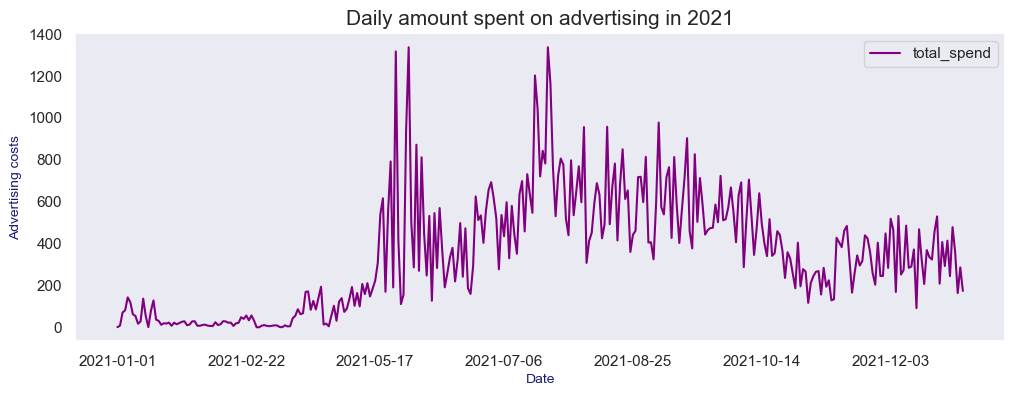

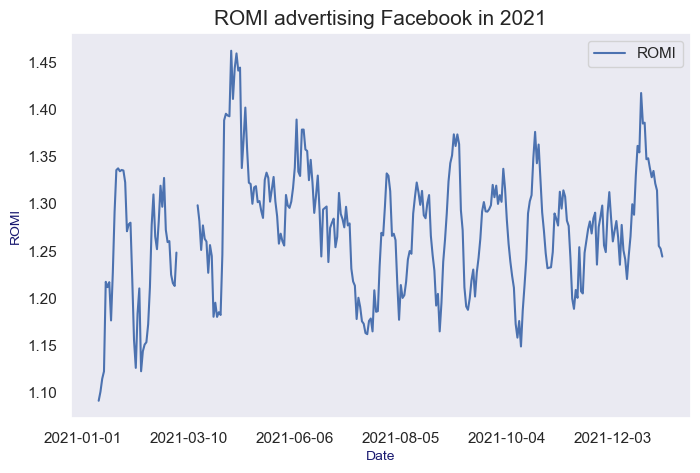

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('facebook_ads_data.csv')
data_df = pd.DataFrame(data)

#Task 1 Group the data by day and build two graphs for the grouped data
grouped = data_df.groupby('ad_date')

group_total_spend = grouped['total_spend'].sum()
group_total_spend_2021 = group_total_spend.loc['2021-01-01':'2021-12-31']

daily_stats = data_df.groupby('ad_date')[['total_spend', 'total_impressions', 'total_clicks', 'total_value']].sum()
daily_stats['romi'] = daily_stats['total_value'] / daily_stats['total_spend']
daily_stats = daily_stats.reset_index()
daily_stats_2021 = daily_stats[(daily_stats['ad_date'] >= '2021-01-01') & (daily_stats['ad_date'] <= '2021-12-31')]


plt.figure(figsize=(12, 4))
group_total_spend_2021.plot(kind='line', color="#800080")
plt.title("Daily amount spent on advertising in 2021", fontsize=15)
plt.xlabel("Date", fontsize="small", color="midnightblue")
plt.ylabel("Advertising costs", fontsize="small", color="midnightblue")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8,5), dpi=100)
plt.plot(daily_stats_2021['ad_date'], daily_stats_2021['romi'].rolling(10).mean(), label='ROMI')
plt.legend()
plt.title('ROMI advertising Facebook in 2021', fontsize=15)
plt.xlabel('Date', fontsize="small", color="midnightblue")
plt.ylabel('ROMI', fontsize="small", color="midnightblue")
plt.xticks(list(daily_stats_2021['ad_date'])[::60])
plt.grid()
plt.show()

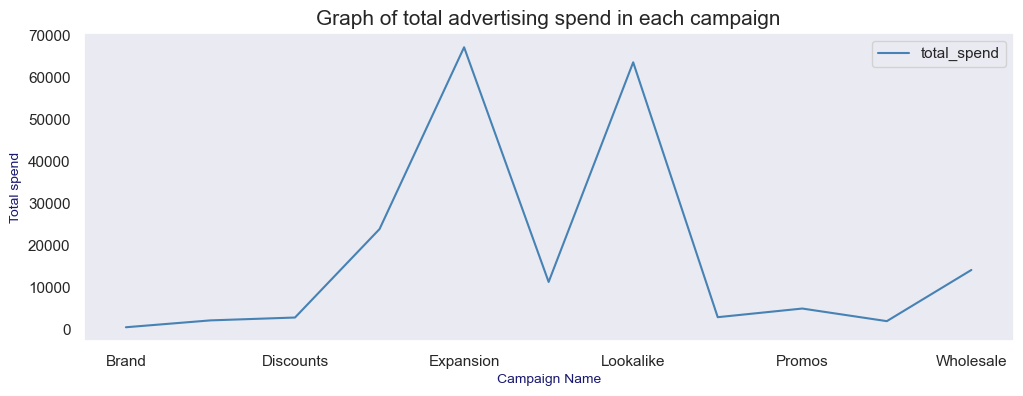

<Axes: xlabel='romi', ylabel='campaign_name'>

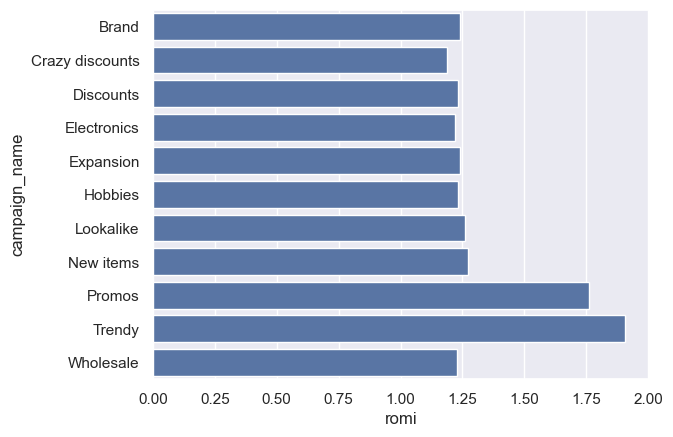

In [31]:
#Task2 Group data by campaign name build two graphs
grouped = data_df.groupby('campaign_name')

group_total_spend_campaign = grouped['total_spend'].sum()

campaign_stats = data_df.groupby('campaign_name')[['total_spend', 'total_value']].sum()
campaign_stats['romi'] = campaign_stats['total_value'] / campaign_stats['total_spend']
campaign_stats = campaign_stats.reset_index()

plt.figure(figsize=(12, 4))
group_total_spend_campaign.plot(kind='line', color="#4682B4")
plt.title("Graph of total advertising spend in each campaign", fontsize=15)
plt.xlabel("Campaign Name", fontsize="small", color="midnightblue")
plt.ylabel("Total spend", fontsize="small", color="midnightblue")
plt.legend()
plt.grid()
plt.show()

sns.set_theme()
sns.barplot(x='romi', y='campaign_name', data=campaign_stats, color="b")



Text(0.5, 1.0, 'Spread the daily ROMI in each campaign (by campaign name.)')

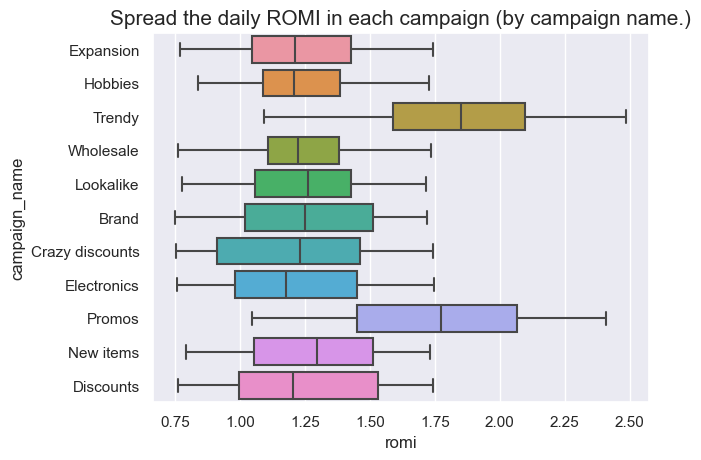

In [32]:
#Task3 Using box plot, determine what was the spread of the daily ROMI in each campaign (by campaign name.)
sns.boxplot(data=data_df, x="romi", y="campaign_name")
plt.title("Spread the daily ROMI in each campaign (by campaign name.)", fontsize=15)


Text(0.5, 1.0, 'Histogram with ROMI value distribution')

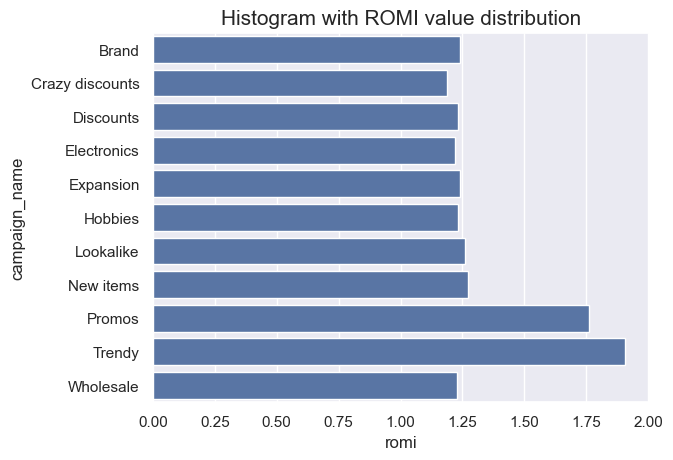

In [33]:
#Task 4 Build a histogram with the distribution of ROMI values in the table facebook_ads_data.csv
sns.barplot(x='romi', y='campaign_name', data=campaign_stats, color="b")
plt.title("Histogram with ROMI value distribution", fontsize=15)

Text(0.5, 1.0, 'Heat map of correlation between all numerical indicators')

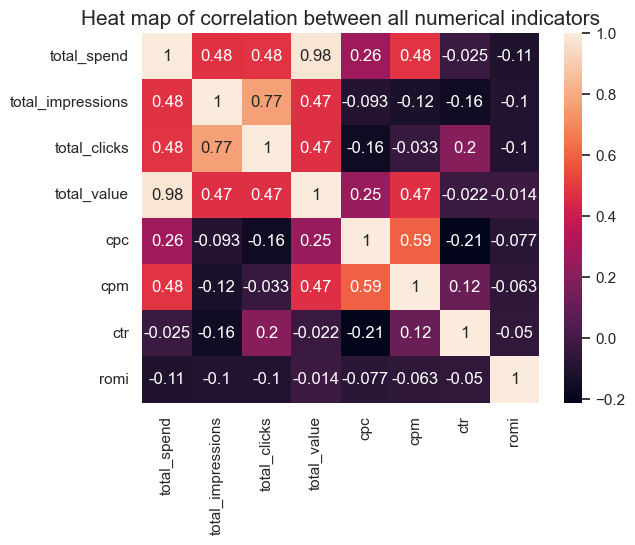

In [34]:
#Task 5 Build a heat map of the correlation between all the numerical indicators in the facebook_ads_data.csv table. Which indicators have the highest and lowest correlation? What correlates "total_value"?
corr = data_df.corr(numeric_only=True)
sns.heatmap(corr, annot = True)  
plt.title("Heat map of correlation between all numerical indicators", fontsize=15)

In [35]:
list_corr = []

for col in corr.columns:
    for row in corr.columns:
        if row != col:
            list_corr.append((row,col, abs(corr.loc[row,col])))

In [36]:
df_corr = pd.DataFrame(data=list_corr,
            columns=['column1','column2','abs_corr'])
            
max_df_corr = df_corr[df_corr['abs_corr']==df_corr['abs_corr'].max()]
min_df_corr = df_corr[df_corr['abs_corr']==df_corr['abs_corr'].min()]
print('Max correlation is between columns {} and {} and equals {}'.format(
    max_df_corr.values[0][0],
    max_df_corr.values[0][1],
    max_df_corr.values[0][2]))

print('Min correlation is between columns {} and {} and equals {}'.format(
    min_df_corr.values[0][0],
    min_df_corr.values[0][1],
    min_df_corr.values[0][2]))

Max correlation is between columns total_value and total_spend and equals 0.9788899258741561
Min correlation is between columns romi and total_value and equals 0.013733044947868506


/Users/anastasiyakhavulyak/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, "Linear regression scatter chart based on data from 'total_spend' та 'total_value' ")

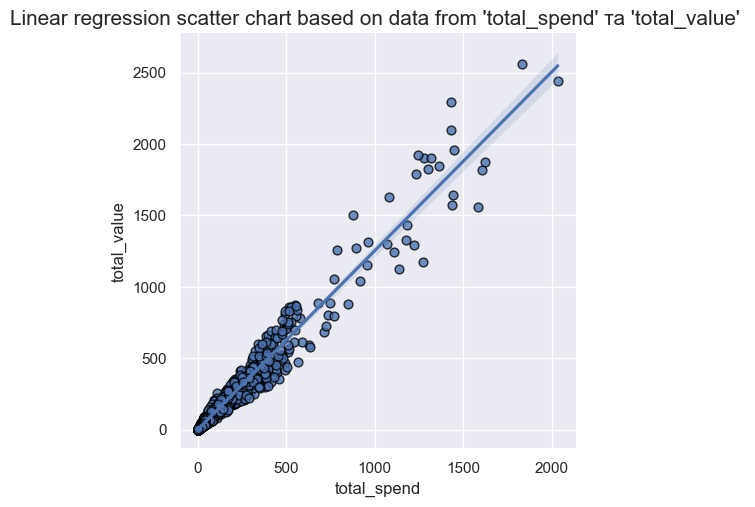

In [37]:
#Task 6 Construct a point diagram with linear regression (for this you can use the lmplot () function), which is built on data from "total_spend" and "total_value" to visualize the connection between these quantities.
sns.lmplot(x="total_spend", y="total_value", scatter_kws = {'s': 40, 'edgecolor':'black'}, data=data_df)
plt.title("Linear regression scatter chart based on data from 'total_spend' та 'total_value' ", fontsize=15)